In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from matplotlib.patches import Ellipse, Rectangle

# CMD Session Rough Layout
J. Isbell - 21 Nov 2024


---

# Key things to include (not necessarily in this order)


## 1. Data loading
- Individual images loading and plotting
- Construct the color index image
- How to extract the stars.... 
- Interactive "radius" 

## 2. Plot a CMD
- Given color index and magnitude, plot in general 
- Make interface to change limits, labels

## 3. Distance modulus
- Latex markup of the equation
- Think about how it scales an isochrone

## 4. Isochrones
- Get a library of pre-computed isochrones at different ages (in abs mag) and metallicities
- The distance is then used to get to apparent mag (at first by us and then by the students)
- Plot range of isochrones
- Think about how to have students match isochrones to the data (chi-by-eye but with reasonable guard rails)

## 5. Boss fight!!! 

---

# 1. Data Loading (more specific)

1. We explain (briefly) the data set and where it comes from 

2. Give them image one and image two, have them assign which belongs to which filter 

3. Display the images (why are they black and white???) -- we should decide on a good scaling and display limits (vmin, vmax) since the dynamic range of the images is likely high
    - probably don't use viridis, black and white is clearer at first 

4. Interface to put in the properly labeled images to get color index 
    - possibly also a dictionary 
    - images = {'blue_filter':image1, 'green_filter': image2}

5. Display color index (coolwarm???)
    - need to show negative values clearly
    - coolwarm might hint at the temperature connection 

6. Extract the stars (either in the background or make them do it interactively -- perhaps also at a later stage)




Which cut is the most important? We guessed parallax 

---
# 2. CMD Display and Interaction

1. Plot a messy CMD with the wrong (default?) limits
2. Identify outliers, think about what they are (bad pixels, galaxies, foreground stars, etc.)
3. Nice interface to change limits (the matplotlib interface is basically clear enough, but we can abstract it one layer)
4. Nice interface to add labels (see below -- dicts are maybe best)
    - could also use dropdowns, but these are functionally equivalent and the point is to expose to some code interaction

In [4]:
#idea for an interface to set labels -- use dicts so that things are clear
#we then process them in the background
labels = {
    "upper-left":   "label1",
    "upper-right":  "label2", 
    "lower-left":   "label3", 
    "lower-right":  "label4"
    }

labels1 = {
    "upper-left":   "bluer, brighter",
    "upper-right":  "redder, brighter", 
    "lower-left":   "bluer, dimmer", 
    "lower-right":  "redder, dimmer"
    }

labels2 = {
    "upper-left":   "hotter, higher mass",
    "upper-right":  "colder, higher mass", 
    "lower-left":   "hotter, lower mass", 
    "lower-right":  "colder, lower mass"
    }



In [5]:
def plot_labels_cmd(labels):
    fig  = plt.figure()
    plt.xlabel('B-V')
    plt.ylabel('B [mag]')
    plt.xlim([-4,4])
    plt.ylim([8,20])

    for k, v in labels.items():
        if k == 'upper-left':
            plt.text(0.2, 0.8, v, transform=fig.transFigure)
        elif k == 'upper-right':
            plt.text(0.7, 0.8, v, transform=fig.transFigure)
        elif k == 'lower-left':
            plt.text(0.2, 0.2, v, transform=fig.transFigure)
        elif k == 'lower-right':
            plt.text(0.7, 0.2, v, transform=fig.transFigure)


    plt.show()
    plt.close()

def plot_labels_physical(labels):
    fig  = plt.figure()
    plt.xlabel('B-V')
    plt.ylabel('B [mag]')
    plt.xlim([-4,4])
    plt.ylim([8,20])

    for k, v in labels.items():
        if k == 'upper-left':
            plt.text(0.2, 0.8, v, transform=fig.transFigure)
        elif k == 'upper-right':
            plt.text(0.65, 0.8, v, transform=fig.transFigure)
        elif k == 'lower-left':
            plt.text(0.2, 0.2, v, transform=fig.transFigure)
        elif k == 'lower-right':
            plt.text(0.65, 0.2, v, transform=fig.transFigure)


    plt.show()
    plt.close()


def plot_labels_stars(labels):
    fig  = plt.figure()
    plt.xlabel('B-V')
    plt.ylabel('B [mag]')
    plt.xlim([-4,4])
    plt.ylim([8,20])

    for k, v in labels.items():
        if k == 'upper-left':
            plt.text(0.2, 0.8, v, transform=fig.transFigure)
        elif k == 'upper-right':
            plt.text(0.65, 0.8, v, transform=fig.transFigure)
        elif k == 'lower-left':
            plt.text(0.2, 0.2, v, transform=fig.transFigure)
        elif k == 'lower-right':
            plt.text(0.65, 0.2, v, transform=fig.transFigure)


    plt.show()
    plt.close()

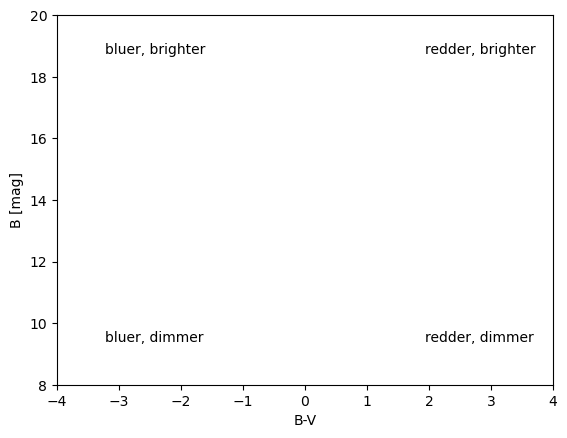

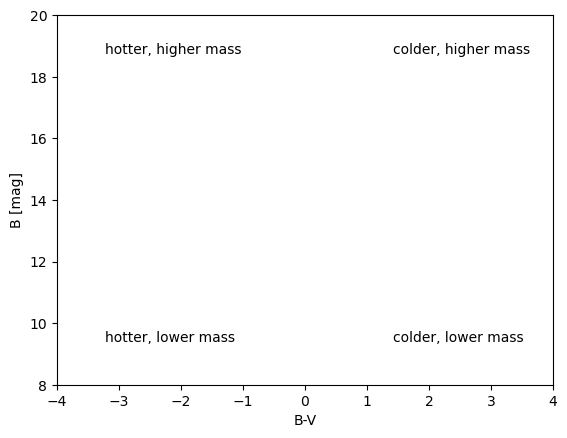

In [6]:
plot_labels_cmd(labels1)

plot_labels_physical(labels2)

---
# 3. Distance Modulus

1. Latex markup for reminder 
    - $m-M = 5 \log_{10}(\frac{d}{10 pc})$


2. Think of how we want them to interact with a function 
    - emphasize that it's really no different than plugging in on pen and paper 
3. Function to apply a distance mod to an isochrone should be well abstracted

--- 
# 4. Isochrones

1. Libarary of pre-computed models for different ages and metallicities
    - maybe [https://waps.cfa.harvard.edu/MIST/model_grids.html](https://waps.cfa.harvard.edu/MIST/model_grids.html)
2. Functions to change them by distance 
3. Interactive element to have them scale/change the values 
    - start with sliders and then move into code entering???
    - display a range of values to guide some guesswork 
4. Ask which isochrones work best and why? 
    - can we find an example where there's some degeneracy? 



In [7]:
from util import read_isochrone_files



isochrones = read_isochrone_files('../isochrones')

ModuleNotFoundError: No module named 'util'

In [8]:
print(isochrones[0]['age'])

NameError: name 'isochrones' is not defined

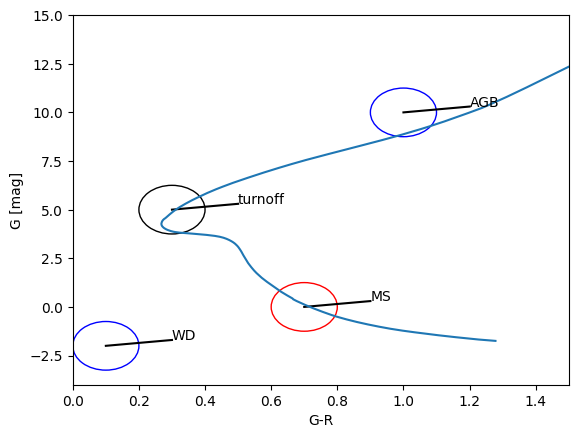

In [39]:
fig, ax = plt.subplots()

ax.set_xlabel('G-R')
ax.set_ylabel('G [mag]')
ax.set_xlim([0,1.5])
ax.set_ylim([-4,15])


def label_turnoff(x,y,label,color='red'):
    ax.text(x+0.2, y+0.3, label)
    ax.plot([x,x+0.2], [y,y+0.3], 'k-')
    ms_ellipse = Ellipse(xy=(x, y), width=0.2, height=2.5, angle=0, fc='none', ec=color)
    ax.add_artist(ms_ellipse)


label_turnoff(0.3,5,'turnoff', color='black')
label_turnoff(0.7,0,'MS', color='red')
label_turnoff(1,10,'AGB', color='blue')
label_turnoff(0.1,-2,'WD', color='blue')

ax.plot(isochrones[-1]['g'].astype(float)-isochrones[-1]['r'].astype(float), isochrones[-1]['g'].astype(float))

plt.show()



In [1]:
def cluster_filter(
        cone_search_radius:float=2,
        minimum_radial_velocity:float=34-13.6, #km/s
        maximum_radial_velocity:float=34+13.6, #km/s
        minimum_parallax:float=1.15-0.12, 
        maximum_parallax:float=1.15+0.12,
        proper_motion_delta:float=0.7,
        proper_motion_ra:float=-11,
        proper_motion_dec:float=-2.9,
        overwrite=False
    ) -> pd.DataFrame:

    # read in the cleaned up M67 dataset
    res = pd.read_csv("../data/gaia_cone_search_results.csv")
    
    # cone search cut
    cluster_coord = SkyCoord(132.85, 11.81, unit=u.deg)
    res_coord = SkyCoord(res.ra, res.dec, unit="deg")
    where_cluster = np.where(res_coord.separation(cluster_coord) < (cone_search_radius*u.deg))
    res = res.iloc[where_cluster]
    
    # radial velocity cut
    res = res[(res.radial_velocity > minimum_radial_velocity) * (res.radial_velocity < maximum_radial_velocity)]
    
    # parallax cut
    res = res[(res.parallax > minimum_parallax) * (res.parallax < maximum_parallax)]
    
    # proper motion cut
    dmu = proper_motion_delta # mas yr^-1; same units as gaia uses
    mu = np.array([proper_motion_ra, proper_motion_dec]) # mas yr^-1; same units as gaia uses
    
    proper_motion_distance = np.sqrt(np.sum((res[["pmra", "pmdec"]] - mu)**2, axis=1))
    res = res[proper_motion_distance <= dmu]
    
    if overwrite:
        res.to_csv("cleaned-M67-data.csv")

    return res

fig, ax = plt.subplots()

ax.set_xlabel('G-R')
ax.set_ylabel('G [mag]')
ax.set_xlim([0,1.5])
ax.set_ylim([-4,15])


def label_turnoff(x,y,label,color='red'):
    ax.text(x+0.2, y+0.3, label)
    ax.plot([x,x+0.2], [y,y+0.3], 'k-')
    ms_ellipse = Ellipse(xy=(x, y), width=0.2, height=2.5, angle=0, fc='none', ec=color)
    ax.add_artist(ms_ellipse)


label_turnoff(0.3,5,'turnoff', color='black')
label_turnoff(0.7,0,'MS', color='red')
label_turnoff(1,10,'AGB', color='blue')
label_turnoff(0.1,-2,'WD', color='blue')

res = cluster_filter()
ax.plot(
    res.phot_bp_mean_mag - res.phot_rp_mean_mag , 
    res.phot_g_mean_mag, 
    marker='.',
    linestyle='none',
    color='k'
)

plt.show()

NameError: name 'pd' is not defined